In [1]:
library(tidyverse)
library(tidyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
egdi <- read.csv('EGOV_DATA_2024.csv') %>%
    select(Country.Name, E.Government.Index) %>%
    arrange(Country.Name)

In [3]:
countries <- unique(egdi$Country.Name)

In [4]:
gdp <- read.csv('gdp_percapita_ppp.csv') %>%
    select(Country.Name, X2024) %>%
    arrange(Country.Name) %>% 
    replace_na(list(X2024 = 0))

In [5]:
setdiff(egdi$Country.Name, gdp$Country.Name)

[1] "Bahamas"                                             
 [2] "Congo"                                               
 [3] "Czech Republic"                                      
 [4] "Côte d'Ivoire"                                       
 [5] "Democratic People's Republic of Korea"               
 [6] "Democratic Republic of the Congo"                    
 [7] "Egypt"                                               
 [8] "Gambia"                                              
 [9] "Georgia (Country)"                                   
[10] "Iran (Islamic Republic of)"                          
[11] "Kyrgyzstan"                                          
[12] "Lao People's Democratic Republic"                    
[13] "Micronesia (Federated States of)"                    
[14] "Republic of Korea"                                   
[15] "Republic of Moldova"                                 
[16] "Saint Kitts and Nevis"                               
[17] "Saint Lucia"                                         
[18] "Saint Vincent and the Grenadines"                    
[19] "Slovakia"                                            
[20] "Türkiye"                                             
[21] "United Kingdom of Great Britain and Northern Ireland"
[22] "United Republic of Tanzania"                         
[23] "United States of America"                            
[24] "Venezuela"                                           
[25] "Yemen"

In [6]:
gdp <- gdp %>% 
    mutate(Country.Name = case_when(
        Country.Name == 'Bahamas, The' ~ 'Bahamas',
        Country.Name == 'Congo, Rep.' ~ 'Congo',
        Country.Name == 'Czechia' ~ 'Czech Republic',
        Country.Name == 'Cote d\'Ivoire' ~ 'Côte d\'Ivoire',
        Country.Name == 'Egypt, Arab Rep.' ~ 'Egypt',
        Country.Name == 'Gambia, The' ~ 'Gambia',
        Country.Name == 'Georgia' ~ 'Georgia (Country)',
        Country.Name == 'Micronesia, Fed. Sts.' ~ 'Micronesia (Federated States of)',
        Country.Name == 'Turkiye' ~ 'Türkiye',
        Country.Name == 'Iran, Islamic Rep.' ~ 'Iran (Islamic Republic of)',
        Country.Name == 'Congo, Dem. Rep.' ~ 'Democratic Republic of the Congo',
        Country.Name == 'Korea, Rep.' ~ 'Republic of Korea',
        Country.Name == 'Moldova' ~ 'Republic of Moldova',
        Country.Name == 'Korea, Dem. People\'s Rep.' ~ 'Democratic People\'s Republic of Korea',
        Country.Name == 'Slovak Republic' ~ 'Slovakia',
        Country.Name == 'St. Kitts and Nevis' ~ 'Saint Kitts and Nevis',
        Country.Name == 'St. Lucia' ~ 'Saint Lucia',
        Country.Name == 'St. Vincent and the Grenadines' ~ 'Saint Vincent and the Grenadines',
        Country.Name == 'Yemen, Rep.' ~ 'Yemen',
        Country.Name == 'Venezuela, RB' ~ 'Venezuela',
        Country.Name == 'United Kingdom' ~ 'United Kingdom of Great Britain and Northern Ireland',
        Country.Name == 'Tanzania' ~ 'United Republic of Tanzania',
        Country.Name == 'United States' ~ 'United States of America',
        Country.Name == 'Lao PDR' ~ 'Lao People\'s Democratic Republic',
        Country.Name == 'Kyrgyz Republic' ~ 'Kyrgyzstan',
        TRUE ~ Country.Name
    )) %>%
    filter(Country.Name %in% egdi$Country.Name) %>%
    arrange(Country.Name)

In [7]:
setdiff(egdi$Country.Name, gdp$Country.Name)

character(0)

In [8]:
length(gdp$Country.Name)

[1] 193

In [9]:
df <- data.frame(
    egdi = egdi$E.Government.Index,
    gdp = gdp$X2024
)

`geom_smooth()` using formula = 'y ~ x'


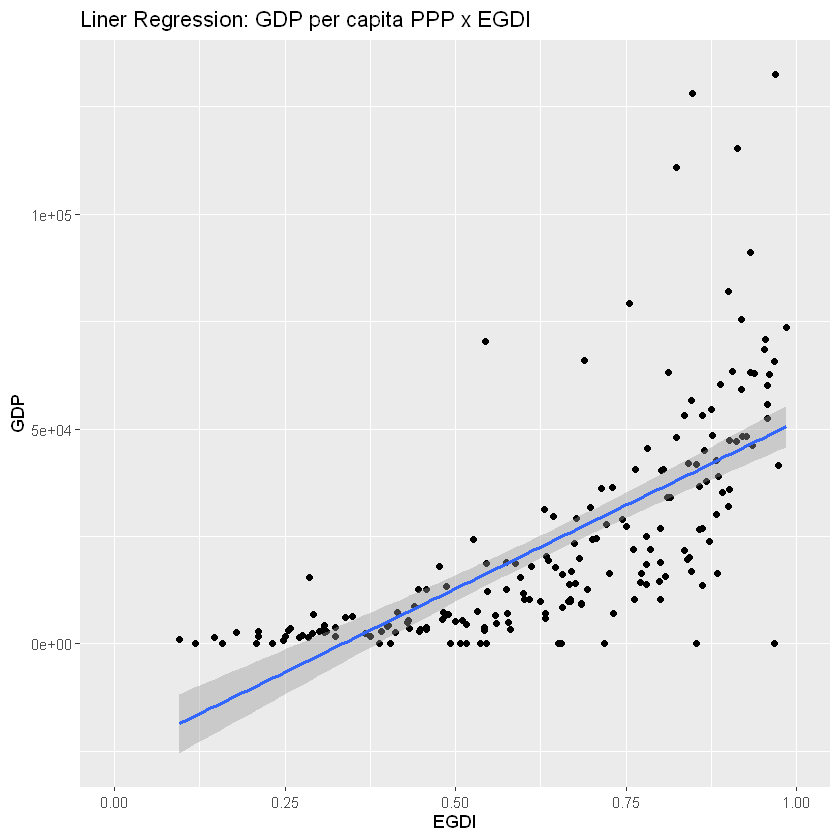

In [10]:
ggplot(df, aes(x = egdi, y = gdp)) +
    geom_point() +
    geom_smooth(method = 'lm') +
    labs(
        title = 'Liner Regression: GDP per capita PPP x EGDI',
        x = 'EGDI',
        y = 'GDP'
    ) +
    coord_cartesian(xlim = c(0, 1))

In [11]:
cor(df$egdi, df$gdp, method = 'spearman')

[1] 0.8158743